## Introducción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Cargando base de datos

In [2]:
data = pd.read_csv("/content/datos_tratados.csv")
data = pd.DataFrame(data)
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [3]:
data = data.drop('customerID', axis=1)
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


Encoding: Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [4]:
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Total'],
      dtype='object')


In [5]:
data.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'CuentasDiarias'],
      dtype='object')

In [6]:
data['Charges.Total'] = pd.to_numeric(data['Charges.Total'], errors='coerce')
data['Charges.Monthly'] = pd.to_numeric(data['Charges.Monthly'], errors='coerce')
data['CuentasDiarias'] = pd.to_numeric(data['CuentasDiarias'], errors='coerce')
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')

In [7]:
data.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados

In [9]:
pd.value_counts(data['Churn'])

/tmp/ipython-input-9-317082697.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Churn'])


,count
Churn,
No,5174
Yes,1869


/tmp/ipython-input-10-1956432020.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  churn_counts = pd.value_counts(data['Churn'])


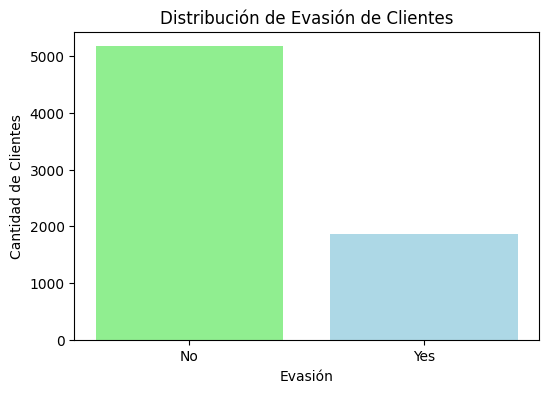

In [10]:
churn_counts = pd.value_counts(data['Churn'])

plt.figure(figsize=(6, 4))
colors = ['lightgreen', 'lightblue']
plt.bar(churn_counts.index.astype(str), churn_counts.values, color=colors)

plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de Clientes')

plt.show()

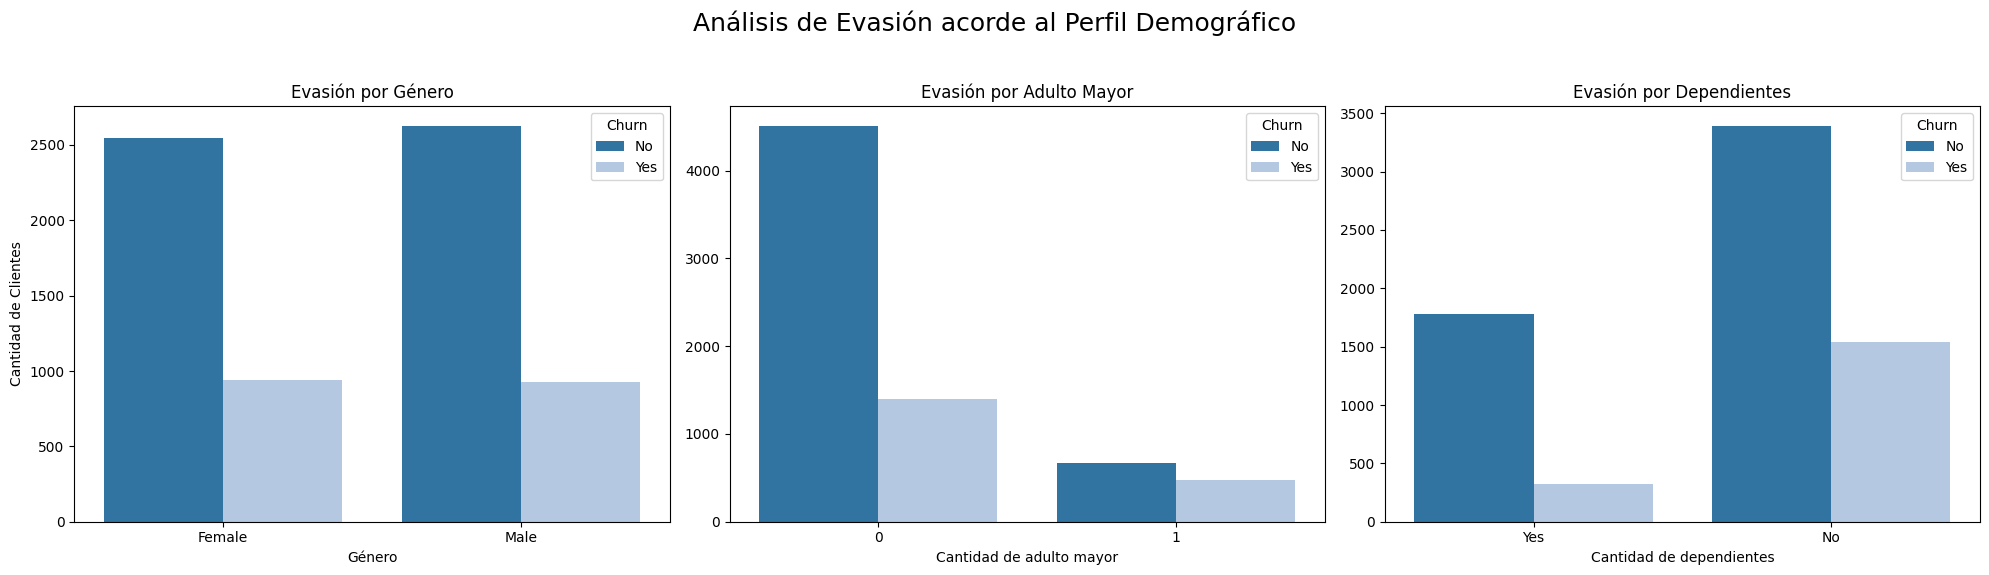

In [11]:
# Gráficos para analizar el churn por variables demográficas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análisis de Evasión acorde al Perfil Demográfico', fontsize=18)

# Género
sns.countplot(ax=axes[0], x='gender', hue='Churn', data = data, palette='tab20')
axes[0].set_title('Evasión por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Cantidad de Clientes')

# Senior Citizen
sns.countplot(ax=axes[1], x='SeniorCitizen', hue='Churn', data = data, palette='tab20')
axes[1].set_title('Evasión por Adulto Mayor')
axes[1].set_xlabel('Cantidad de adulto mayor')
axes[1].set_ylabel('')

# Dependientes
sns.countplot(ax=axes[2], x='Dependents', hue='Churn', data = data, palette='tab20')
axes[2].set_title('Evasión por Dependientes')
axes[2].set_xlabel('Cantidad de dependientes')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

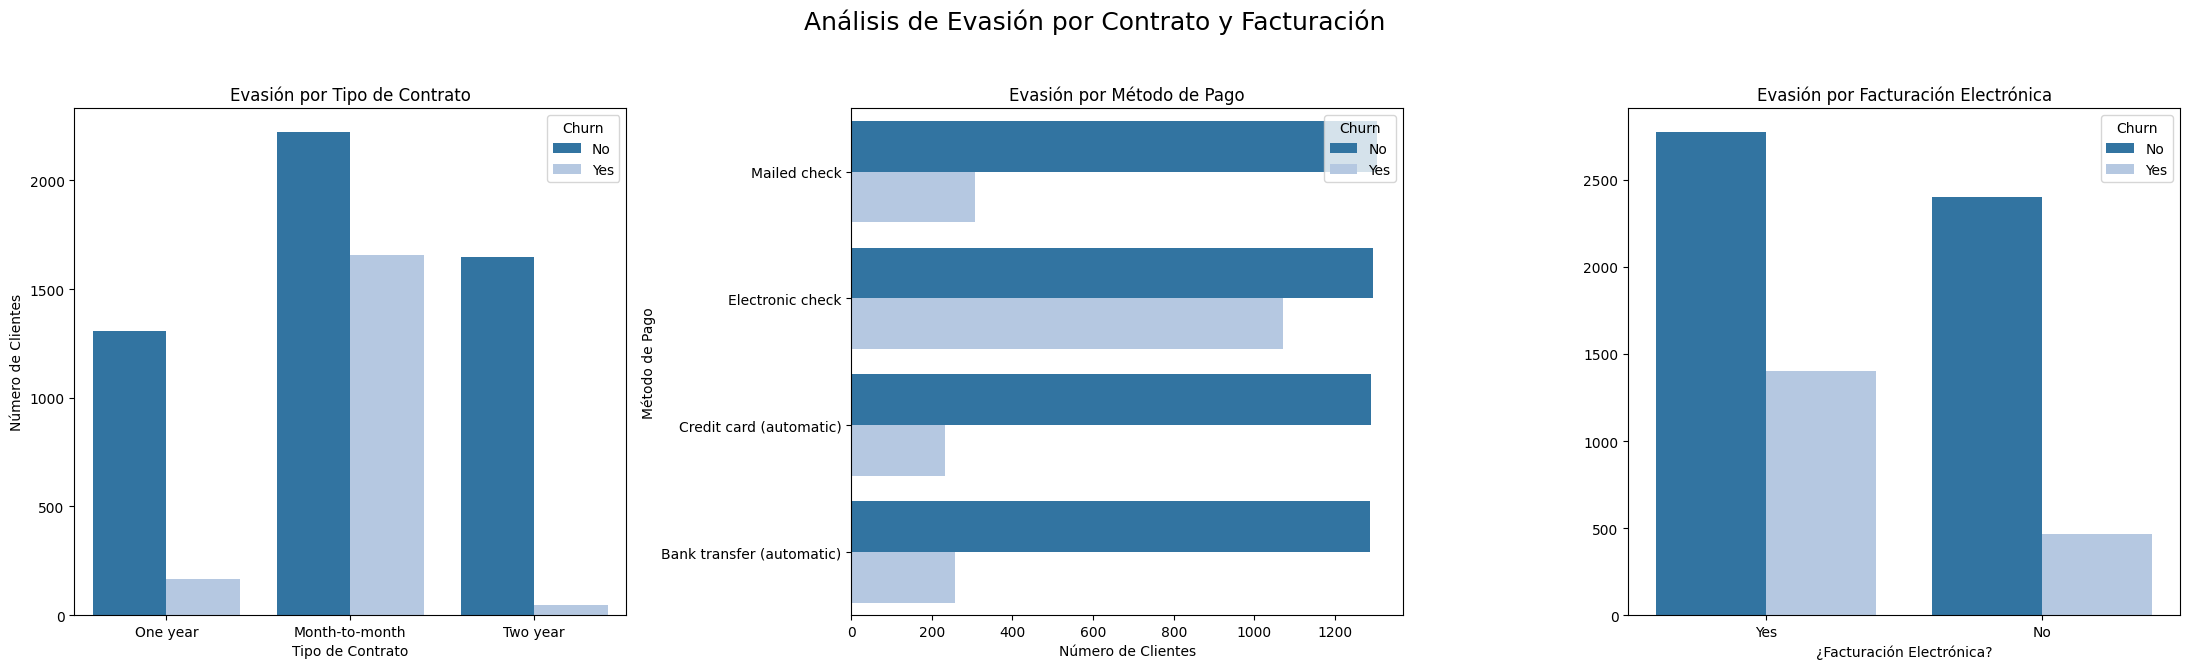

In [12]:
# Gráficos para analizar el churn por tipo de contrato y facturación
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Análisis de Evasión por Contrato y Facturación', fontsize=18)

# Tipo de Contrato
sns.countplot(ax=axes[0], x='Contract', hue='Churn', data = data, palette = 'tab20')
axes[0].set_title('Evasión por Tipo de Contrato')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Número de Clientes')

# Método de Pago
sns.countplot(ax=axes[1], y='PaymentMethod', hue='Churn', data = data, palette = 'tab20')
axes[1].set_title('Evasión por Método de Pago')
axes[1].set_xlabel('Número de Clientes')
axes[1].set_ylabel('Método de Pago')

# Facturación sin papel (Paperless Billing)
sns.countplot(ax=axes[2], x='PaperlessBilling', hue='Churn', data = data, palette = 'tab20')
axes[2].set_title('Evasión por Facturación Electrónica')
axes[2].set_xlabel('¿Facturación Electrónica?')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

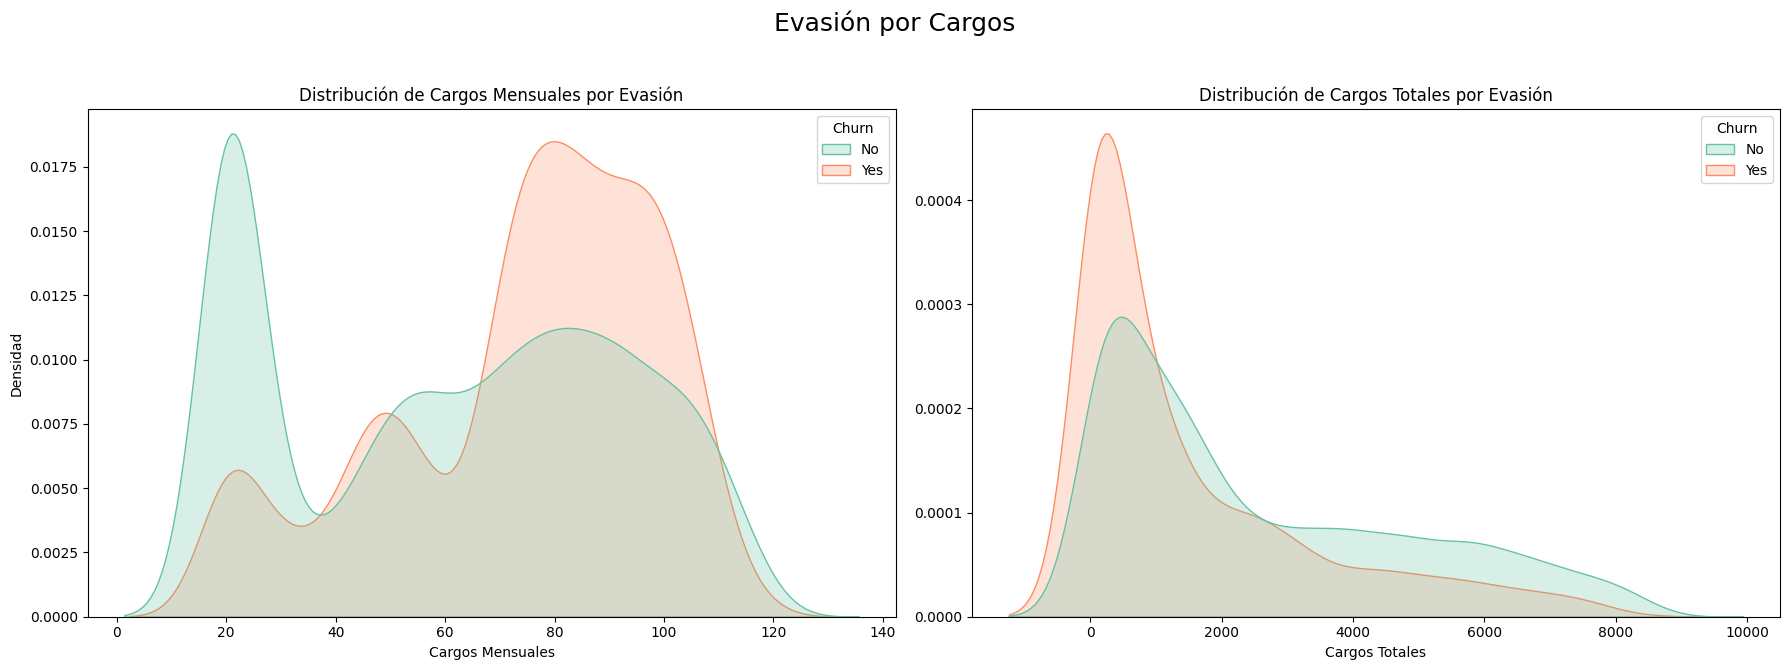

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Evasión por Cargos', fontsize=18)

sns.kdeplot(ax = axes[0], x = 'Charges.Monthly', hue = 'Churn', data = data, fill = True, common_norm = False, palette = 'Set2')
axes[0].set_title('Distribución de Cargos Mensuales por Evasión')
axes[0].set_xlabel('Cargos Mensuales')
axes[0].set_ylabel('Densidad')

sns.kdeplot(ax = axes[1], x = 'Charges.Total', hue = 'Churn', data = data, fill = True, common_norm = False, palette = 'Set2')
axes[1].set_title('Distribución de Cargos Totales por Evasión')
axes[1].set_xlabel('Cargos Totales')
axes[1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

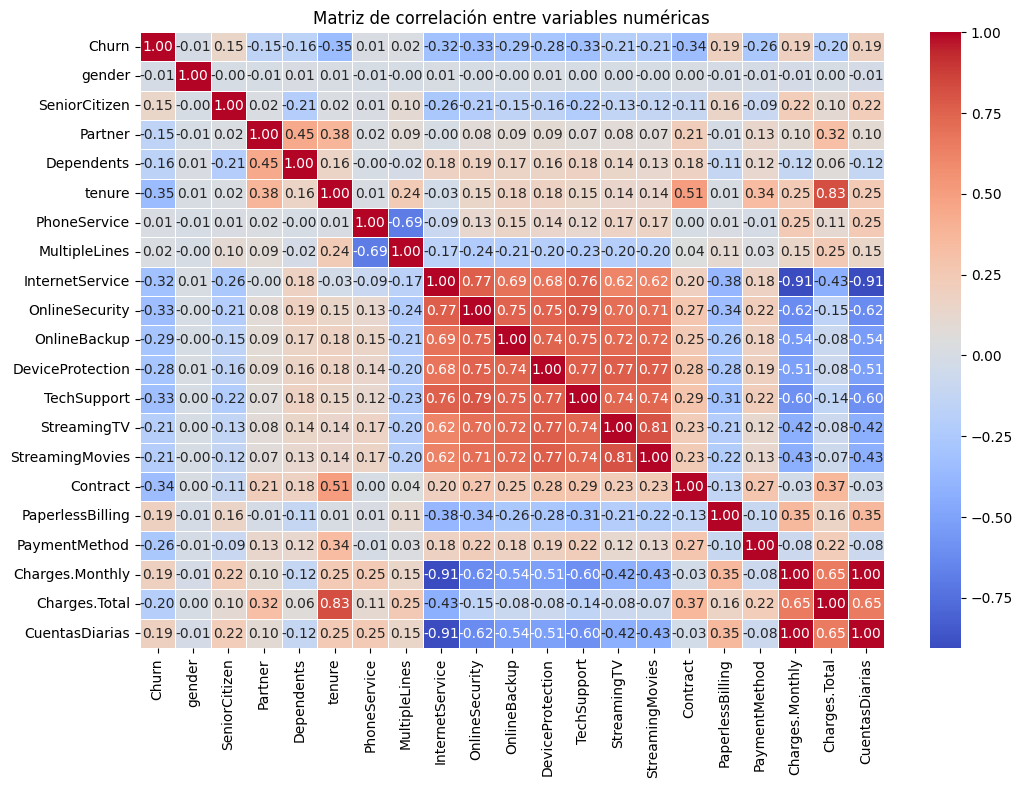

In [14]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
data['DeviceProtection'] = data['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
data['TechSupport'] = data['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
data['StreamingTV'] = data['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
data['InternetService'] = data['InternetService'].map({'Fiber optic': 1, 'DSL': 2, 'No': 3})
data['Contract'] = data['Contract'].map({'Month-to-month': 1, 'Two year': 2, 'One year': 3})
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 1, 'Mailed check': 2, 'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4})
data['tenure'] = data['tenure'].astype(int)
data['Charges.Monthly'] = data['Charges.Monthly'].astype(float)
data['Charges.Total'] = data['Charges.Total'].astype(float)

correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

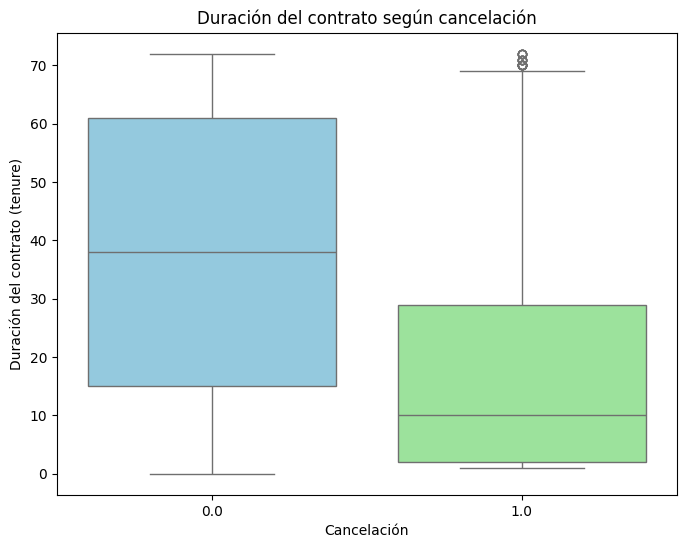

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Churn',
    y='tenure',
    hue='Churn',
    data=data.astype({'Churn': 'object'}),
    palette={0.0: 'skyblue', 1.0: 'lightgreen'},
    dodge=False
)
plt.title('Duración del contrato según cancelación')
plt.xlabel('Cancelación')
plt.ylabel('Duración del contrato (tenure)')
plt.legend().set_visible(False)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

data_cleaned = data.dropna(subset=['Churn'])

X = data_cleaned.drop("Churn", axis=1)
y = data_cleaned["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% para prueba
    random_state=42,      # Para reproducibilidad
    stratify=y            # Para mantener la proporción de clases en ambos conjuntos
)

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]

X_test_cleaned = X_test.dropna()
y_test_cleaned = y_test[X_test_cleaned.index]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train_cleaned)

y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test_cleaned, y_pred_logreg))
print(classification_report(y_test_cleaned, y_pred_logreg))

=== Regresión Logística ===
[[923 111]
 [182 192]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1034
         1.0       0.63      0.51      0.57       374

    accuracy                           0.79      1408
   macro avg       0.73      0.70      0.72      1408
weighted avg       0.78      0.79      0.78      1408



In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("=== Árbol de Decisión ===")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


=== Árbol de Decisión ===
[[846 189]
 [196 178]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      1035
         1.0       0.49      0.48      0.48       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



=== Regresión Logística ===
Accuracy: 0.7919034090909091
Precision: 0.6336633663366337
Recall: 0.5133689839572193
F1 Score: 0.5672082717872969

=== Árbol de Decisión ===
Accuracy: 0.7267565649396736
Precision: 0.48501362397820164
Recall: 0.47593582887700536
F1 Score: 0.48043184885290147


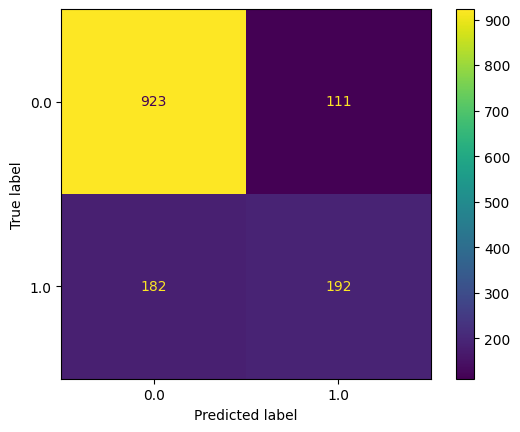

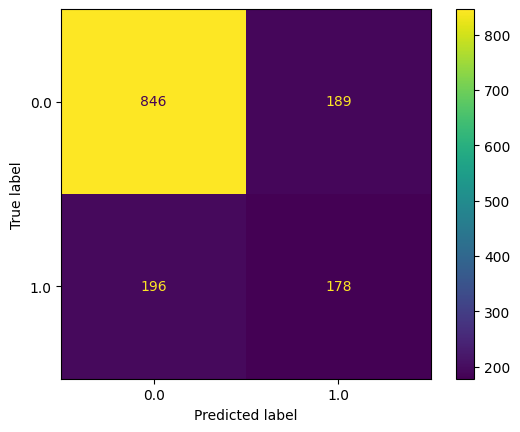

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluación para Regresión Logística (con normalización)
print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_logreg))
print("Precision:", precision_score(y_test_cleaned, y_pred_logreg))
print("Recall:", recall_score(y_test_cleaned, y_pred_logreg))
print("F1 Score:", f1_score(y_test_cleaned, y_pred_logreg))
ConfusionMatrixDisplay.from_predictions(y_test_cleaned, y_pred_logreg)

# Evaluación para Árbol de Decisión (sin normalización)
print("\n=== Árbol de Decisión ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

### Regresión logística


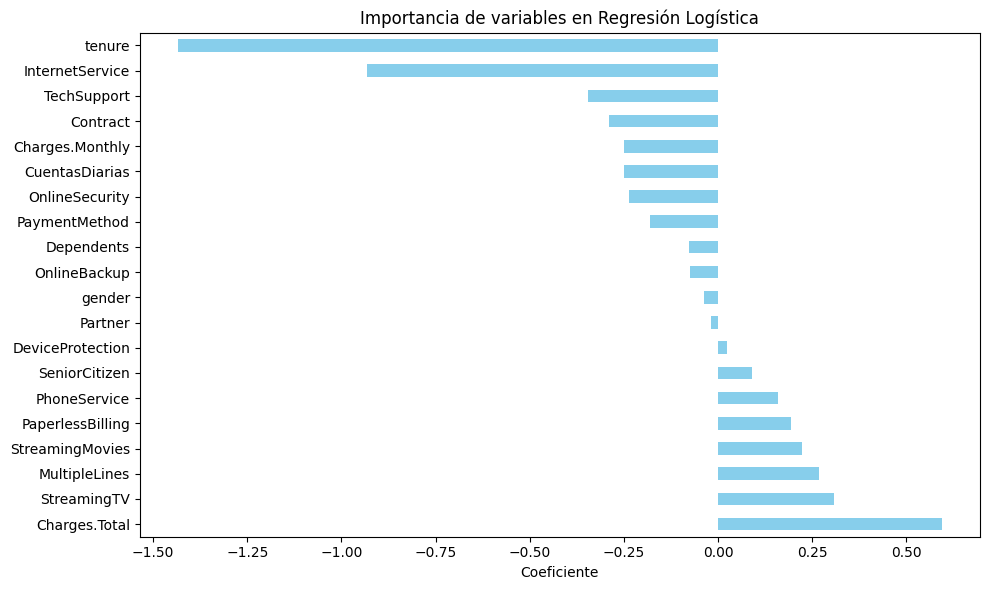

In [29]:
coefficients = pd.Series(logreg.coef_[0], index=X_train.columns)
coefficients = coefficients.sort_values(ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='skyblue')
plt.title('Importancia de variables en Regresión Logística')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()


### Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
[[933 102]
 [190 184]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



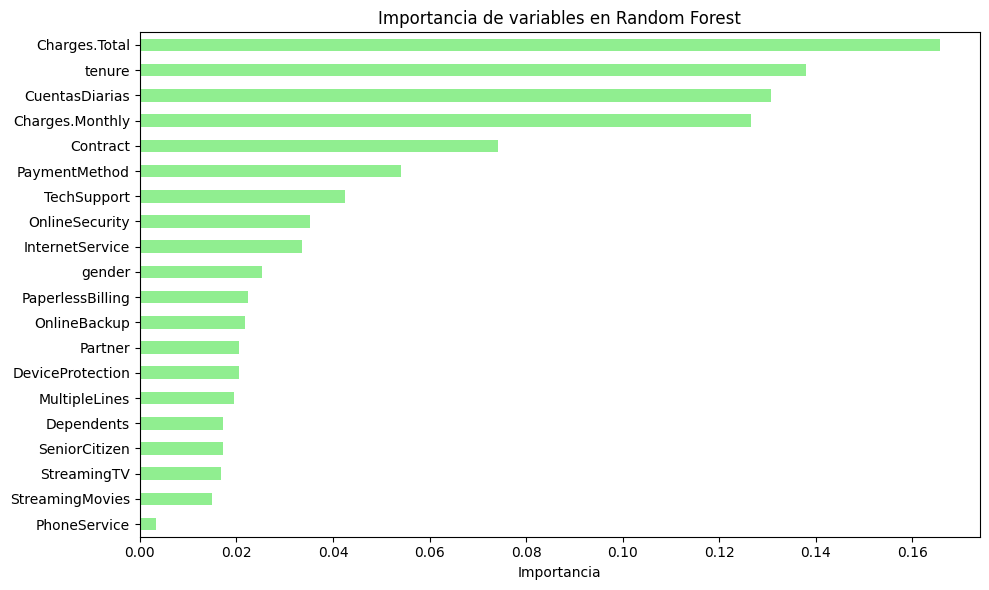

In [32]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns).sort_values()

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='barh', color='lightgreen')
plt.title('Importancia de variables en Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

### KNN

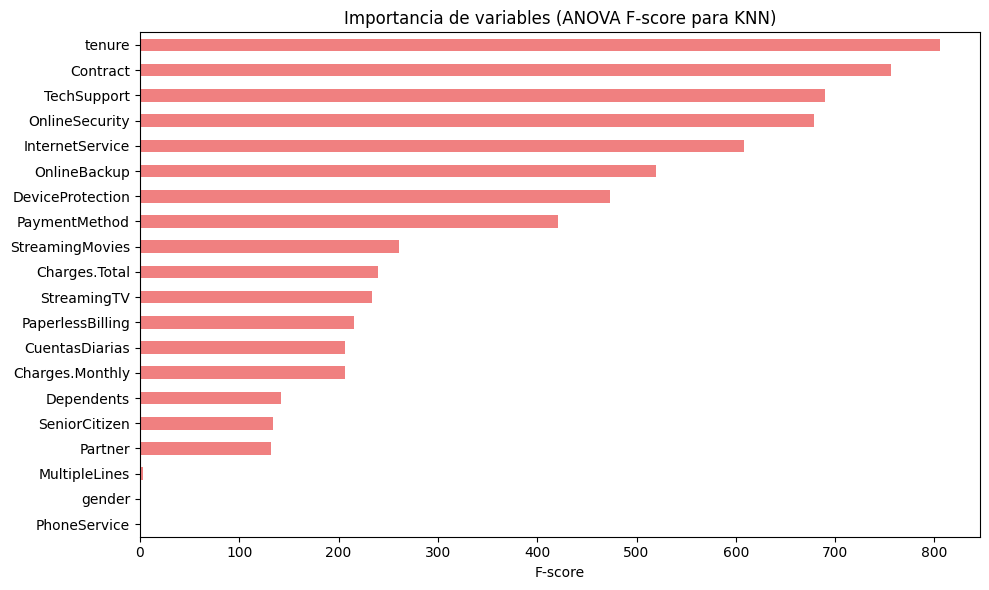

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import pandas as pd

X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_cleaned, y_train_cleaned)

scores = pd.Series(selector.scores_, index=X_train_cleaned.columns).sort_values()

plt.figure(figsize=(10, 6))
scores.plot(kind='barh', color='lightcoral')
plt.title('Importancia de variables (ANOVA F-score para KNN)')
plt.xlabel('F-score')
plt.tight_layout()
plt.show()

### SVM

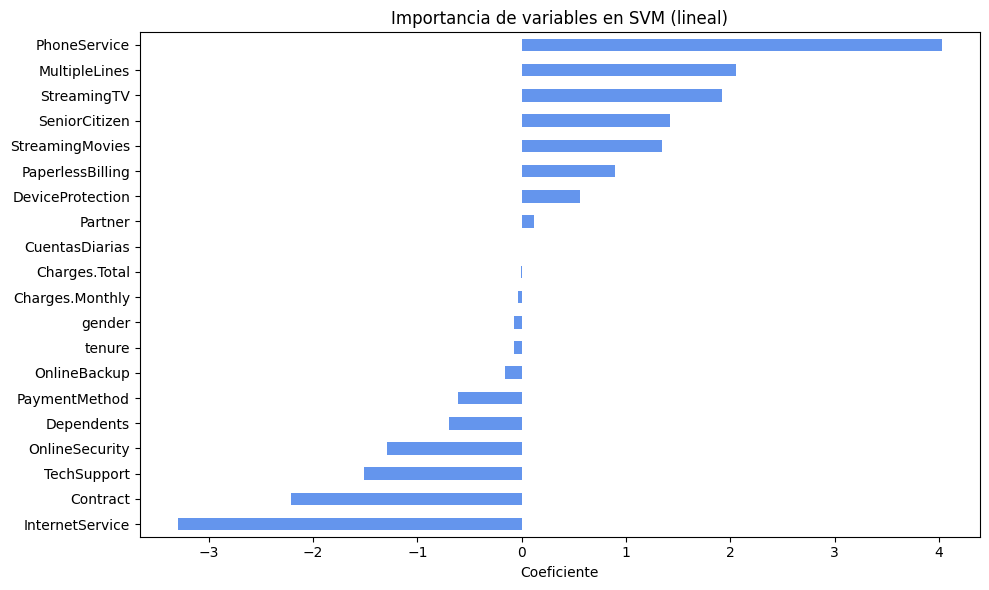

=== Support Vector Machine (SVM) ===
[[940  94]
 [205 169]]
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1034
         1.0       0.64      0.45      0.53       374

    accuracy                           0.79      1408
   macro avg       0.73      0.68      0.70      1408
weighted avg       0.77      0.79      0.77      1408



In [38]:
# Entrenamiento de SVM con kernel lineal (si aún no lo has hecho)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_cleaned, y_train_cleaned)

# Obtener coeficientes (Solo para kernel lineal)
# Note: Feature importances for non-linear SVM kernels are not directly available as coefficients.
if svm_model.kernel == 'linear':
    svm_coefficients = pd.Series(svm_model.coef_[0], index=X_train_cleaned.columns).sort_values()

    # Visualizar
    plt.figure(figsize=(10, 6))
    svm_coefficients.plot(kind='barh', color='cornflowerblue')
    plt.title('Importancia de variables en SVM (lineal)')
    plt.xlabel('Coeficiente')
    plt.tight_layout()
    plt.show()

# Predicción
y_pred_svm = svm_model.predict(X_test_cleaned)

# Resultados
print("=== Support Vector Machine (SVM) ===")
print(confusion_matrix(y_test_cleaned, y_pred_svm))
print(classification_report(y_test_cleaned, y_pred_svm))